In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
# train_end_idx = len(df) 
df_test = pd.read_csv('test.csv')

In [3]:
print("train data: ",df.shape)
print("test data: ",df_test.shape)

train data:  (35156, 22)
test data:  (34844, 21)


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,2016-07-19,NaN,19.5,NaN,5.69496,0.500000,ENE,61.0,ENE,ENE,...,86.641375,41.810006,1020.4,1021.9,NaN,7.00000,NaN,19.6,0,NaN
1,2010-07-26,Canberra,2.1,15.7,NaN,5.700000,E,26.0,NaN,SE,...,53.275715,76.598048,1023.7,1020.8,4.000000,1.00000,9.0,14.1,0,0.0
2,2014-04-02,Woomera,20.9,36.1,5.69496,NaN,S,39.0,S,SW,...,15.471574,52.163254,1017.1,1014.9,4.167266,4.27812,24.2,33.9,0,0.0
3,2014-11-19,Tuggeranong,11.5,23.9,5.69496,7.993227,NNE,35.0,W,NaN,...,46.442398,67.664733,1010.2,NaN,4.167266,4.27812,13.8,21.8,1,0.2
4,NaN,Hobart,8.2,20.5,3.20000,NaN,N,69.0,N,WNW,...,51.830889,51.770240,NaN,1001.2,7.000000,7.00000,NaN,17.6,0,0.6


## A. drop RISK_MM (attribute highly related rain in future)

In [5]:
df.drop(['RISK_MM'], axis=1, inplace=True)
df_test.drop(['RISK_MM'], axis=1, inplace=True)

In [6]:
# col_names = df.columns
col_names = [var for var in df.columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 21 columns):
Date             28098 non-null object
Location         27922 non-null object
MinTemp          28089 non-null float64
MaxTemp          28264 non-null float64
Evaporation      28142 non-null float64
Sunshine         28093 non-null float64
WindGustDir      26466 non-null object
WindGustSpeed    28148 non-null float64
WindDir9am       26132 non-null object
WindDir3pm       27424 non-null object
WindSpeed9am     28120 non-null float64
WindSpeed3pm     28143 non-null float64
Humidity9am      28128 non-null float64
Humidity3pm      28064 non-null float64
Pressure9am      28118 non-null float64
Pressure3pm      28060 non-null float64
Cloud9am         28127 non-null float64
Cloud3pm         28208 non-null float64
Temp9am          28092 non-null float64
Temp3pm          28151 non-null float64
RainToday        35156 non-null int64
dtypes: float64(15), int64(1), object(5)
memory usage: 5.6

## numerical attribute

In [8]:
numerical = [var for var in df.columns if df[var].dtype!='O']
numerical.remove('RainToday')
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 15 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


## categorical attribute

In [9]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


# B. split data

In [10]:
## 80%, 20%
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    df.drop(columns = ['RainToday']).values, df['RainToday'].values, test_size=0.2)

In [11]:
print("train set: ", X_train.shape)
print("validation set: ",X_val.shape)

train set:  (28124, 20)
validation set:  (7032, 20)


In [12]:
# remove lable
col_names.remove('RainToday')
col_names

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [13]:
## transfer data to dataframe
def transfer_to_df(numpy_data, attribute):
    data_process = pd.DataFrame(numpy_data)
    data_process.columns = attribute
    return data_process

In [14]:
X_train = transfer_to_df(X_train, col_names)
X_val = transfer_to_df(X_val, col_names)
df_test = transfer_to_df(df_test, col_names)

# C. Missing value

### **************   KNN    ***************************

##### KNN only can deal numerical data, categorical data need to some preprocess due to use API

## 1. deal categorical data

In [15]:
from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=3)
from sklearn.preprocessing import LabelEncoder

 #### 1) fill value to nan

Location

In [16]:
X_train.Location.unique()

array(['SalmonGums', 'Brisbane', 'Woomera', 'Bendigo', 'WaggaWagga',
       'Sydney', 'Moree', 'Hobart', 'BadgerysCreek', 'Melbourne',
       'Richmond', 'Perth', 'Cairns', nan, 'Nuriootpa', 'GoldCoast',
       'Townsville', 'Williamtown', 'AliceSprings', 'Wollongong',
       'Witchcliffe', 'Portland', 'Ballarat', 'Adelaide', 'NorahHead',
       'MelbourneAirport', 'Newcastle', 'Nhil', 'MountGinini', 'Watsonia',
       'Uluru', 'Launceston', 'Sale', 'Mildura', 'PearceRAAF', 'Walpole',
       'Canberra', 'NorfolkIsland', 'Darwin', 'Albany', 'Tuggeranong',
       'Cobar', 'CoffsHarbour', 'Albury', 'MountGambier', 'PerthAirport',
       'Penrith', 'Dartmoor', 'Katherine', 'SydneyAirport'], dtype=object)

In [17]:
X_train['Location'] = X_train['Location'].fillna('city')
X_val['Location'] = X_val['Location'].fillna('city')
df_test['Location'] = df_test['Location'].fillna('city')

In [18]:
# # check frequency distribution of values in Location variable
# # X_train.Location.unique()
# X_train.Location.value_counts()

WindGustDir

In [19]:
# check labels in WindGustDir variable
X_train['WindGustDir'].unique()

array(['SSW', 'W', 'SE', 'WNW', 'WSW', 'SSE', 'ENE', nan, 'NNW', 'N',
       'NNE', 'E', 'NE', 'ESE', 'NW', 'SW', 'S'], dtype=object)

In [20]:
X_train['WindGustDir'] = X_train['WindGustDir'].fillna('NSWE')
X_val['WindGustDir'] = X_val['WindGustDir'].fillna('NSWE')
df_test['WindGustDir'] = df_test['WindGustDir'].fillna('NSWE')

In [21]:
# X_train['WindGustDir'].unique()

WindDir9am

In [22]:
# check labels in WindDir9am variable
X_train['WindDir9am'].unique()

array(['S', 'SW', 'SSW', 'SSE', 'W', nan, 'ESE', 'N', 'NNW', 'NE', 'NNE',
       'NW', 'ENE', 'WSW', 'SE', 'E', 'WNW'], dtype=object)

In [23]:
X_train['WindDir9am'] = X_train['WindDir9am'].fillna('NSWE')
X_val['WindDir9am'] = X_val['WindDir9am'].fillna('NSWE')
df_test['WindDir9am'] = df_test['WindDir9am'].fillna('NSWE')

In [24]:
# X_train['WindDir9am'].unique()

WindDir3pm

In [25]:
# check labels in WindDir3pm variable
X_train['WindDir3pm'].unique()

array(['SE', 'NE', nan, 'N', 'NNE', 'ESE', 'SSE', 'SW', 'W', 'ENE', 'WNW',
       'NNW', 'S', 'NW', 'WSW', 'E', 'SSW'], dtype=object)

In [26]:
X_train['WindDir3pm'] = X_train['WindDir3pm'].fillna('NSWE')
X_val['WindDir3pm'] = X_val['WindDir3pm'].fillna('NSWE')
df_test['WindDir3pm'] = df_test['WindDir3pm'].fillna('NSWE')

Date

In [27]:
# check labels in WindDir3pm variable
X_train['Date'].unique()

array(['2017-03-23', '2016-09-27', '2014-12-10', ..., '2008-09-12',
       '2008-11-04', '2008-07-12'], dtype=object)

In [28]:
# # from sklearn.impute import SimpleImputer
# # def fill_freq(data):
# #     imp_mean = SimpleImputer(strategy='most_frequent')
# #     imp_mean.fit(data)
# #     imputed_train_df = imp_mean.transform(data)
# #     return imputed_train_df

# n = 3
# freq_train = X_train['Date'].value_counts()[:n].index.tolist()
# freq_train

In [29]:
# X_train['Date'] = fill_freq(X_train['Date'])

X_train['Date'] = X_train['Date'].fillna('0')
X_val['Date'] = X_val['Date'].fillna('0')
df_test['Date'] = df_test['Date'].fillna('0')

In [30]:
X_train['Date'].count()

28124

In [31]:
'''
input: date attribute
output: ndarray
'''

def fillna_date(dataframe):
    x = 0
    size = dataframe['Date'].count()
    date_data = np.zeros(size, dtype = np.int)
    # len(date_data)

    for data_ori in dataframe['Date']:
        if data_ori != '0':
            date_arr = data_ori.split("-")
            post_date = date_arr[0] + date_arr[1]
            date_data[x] = post_date
        x += 1
    dataframe = pd.DataFrame(date_data)
    return dataframe

In [32]:
X_train['Date'] = fillna_date(X_train)
X_train

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,201703,SalmonGums,5.3,14.7,5.69496,7.99323,SSW,30,S,SE,13,11,63.01,58.9805,1018.03,NaN,4.16727,4.27812,NaN,13.5
1,201609,Brisbane,8.9,NaN,2.2,NaN,W,20,SW,NE,9,6,44.9158,63.8361,1022.6,1020,NaN,NaN,14,22.2
2,201412,Woomera,4.5,15.1,4,7.99323,SE,NaN,SSW,NSWE,19,20,54.0222,76.1451,1030.4,1027.9,0,4.27812,8,14.3
3,201103,Bendigo,17.8,29.5,5.69496,7.99323,WNW,61,SSE,SE,15,24,NaN,57.0468,1011.3,1008.9,NaN,4.27812,21.8,28.3
4,201103,WaggaWagga,NaN,16.7,2,9,WSW,33,W,NSWE,NaN,17,54.4626,72.5521,NaN,1015.4,6,NaN,12.8,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,200909,Woomera,19,37.7,5.69496,13.6,NSWE,43,ESE,S,24,9,7.97029,46.2086,1013.9,1011.1,NaN,4.27812,27,36.2
28120,201309,city,1.9,17.9,2.2,2.7,NNW,52,SE,NSWE,4,26,NaN,82.2688,NaN,1004.6,7,4.27812,6.7,16.3
28121,0,Albury,NaN,21,NaN,7.99323,SE,30,ESE,SE,17,15,45.7504,56.2814,1021.6,1019.2,4.16727,4.27812,16.2,20.6
28122,201512,Hobart,7.1,16.5,1.4,2.9,NSWE,48,SE,NSWE,NaN,15,NaN,64.8905,1008.4,NaN,4.16727,4.27812,NaN,15.2


In [33]:
X_val['Date'] = fillna_date(X_val)
X_val

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,201110,Melbourne,3.2,14.3,1.6,NaN,N,NaN,N,N,19,NaN,52.0973,66.6374,1028.1,1023.5,NaN,7,6,13.3
1,201504,NorahHead,12.0783,23.6973,5.69496,7.99323,WNW,NaN,NW,WNW,19,NaN,50.3729,61.1823,1009.9,NaN,4.16727,4.27812,17.1626,16.2
2,201606,city,7,13.9,NaN,NaN,N,50,NE,N,6,13,63.1431,NaN,1017.1,NaN,6,NaN,8.8,NaN
3,201702,Albury,15,35.8,5.69496,NaN,NSWE,46,NSWE,NW,4,17,21.8883,61.5792,1014.9,NaN,4.16727,4.27812,23.3,34.9
4,201009,Hobart,10.1,19.1,2.2,8.1,NNW,NaN,NSWE,NNW,NaN,17,NaN,61.2442,1014.7,1014.9,4.16727,4.27812,13.3,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,200912,AliceSprings,NaN,25.3,NaN,6.9,NSWE,NaN,NSWE,NW,0,11,28.749,NaN,1022,1019,7,NaN,NaN,NaN
7028,201401,Wollongong,17.8,NaN,5.69496,NaN,NE,NaN,SSW,NSWE,NaN,11,77.1341,57.8953,1024.7,1022.8,8,8,NaN,20.9
7029,201503,AliceSprings,NaN,28.9,9,2.5,ESE,41,SSE,ENE,17,NaN,22.9922,46.0573,1016,NaN,7,NaN,NaN,28.2
7030,201412,SydneyAirport,6.5,22.6,1.6,7.7,NW,43,WNW,WSW,15,17,28.5795,57.1266,1016.1,1011.2,1,7,13.3,20.3


In [34]:
df_test['Date'] = fillna_date(df_test)
df_test

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,201307,Tuggeranong,NaN,NaN,5.69496,NaN,N,19.0,NSWE,N,0.0,4.0,43.432433,74.253446,1025.3,1022.0,4.167266,4.27812,9.4,NaN
1,201503,Darwin,17.9,31.4,7.20000,11.000000,NSWE,37.0,NSWE,NW,20.0,NaN,30.315765,NaN,1015.8,1010.7,0.000000,0.00000,23.1,NaN
2,201706,Albury,9.9,24.9,5.69496,7.993227,NSWE,NaN,NSWE,SSE,0.0,19.0,44.068918,68.299536,1025.8,1022.0,NaN,4.27812,17.4,NaN
3,200802,Sale,NaN,22.0,3.60000,8.800000,WNW,NaN,NW,NSWE,11.0,19.0,NaN,NaN,1021.3,1017.4,3.000000,3.00000,10.1,NaN
4,201411,city,24.0,NaN,5.40000,7.300000,S,30.0,SE,SE,NaN,NaN,65.558591,58.146710,1008.4,1006.1,3.000000,NaN,NaN,30.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34839,201610,Moree,20.1,32.2,NaN,10.800000,NE,48.0,NSWE,NNE,35.0,NaN,40.373215,62.618689,1018.1,NaN,NaN,6.00000,23.9,30.1
34840,201605,Adelaide,22.2,35.4,5.69496,5.100000,NW,NaN,NE,SW,9.0,9.0,30.101395,49.509689,NaN,1006.5,4.167266,4.27812,NaN,32.9
34841,0,city,NaN,NaN,NaN,7.993227,WSW,24.0,ESE,WSW,6.0,13.0,60.326432,78.393383,NaN,1020.1,4.167266,4.27812,14.2,21.5
34842,0,CoffsHarbour,14.1,20.3,6.40000,8.000000,NSWE,30.0,NSWE,ESE,20.0,NaN,NaN,47.026284,1017.2,1012.8,NaN,4.00000,18.0,19.2


#### 2) Lable encode

##### Encoding....

In [35]:
def get_attri_dict(dataframe, attri):
    attri_dict = {}
    attri_arr = dataframe[attri].unique()
#     print(attri_arr)
    x = 0
    for i in attri_arr:
        attri_dict[i] = x
        x += 1
    
    return attri_dict

In [36]:
def get_data_attri_dict(data):
    
    Date_dict = get_attri_dict(data, "Date")
    Location_dict = get_attri_dict(data, "Location")
    WindGustDir_dict = get_attri_dict(data, "WindGustDir")
    WindDir9am_dict = get_attri_dict(data, "WindDir9am")
    WindDir3pm_dict = get_attri_dict(data, "WindDir3pm")
    
    return Date_dict, Location_dict, WindGustDir_dict, WindDir9am_dict, WindDir3pm_dict

In [37]:
X_train_Date_dict, X_train_Location_dict, X_train_WindGustDir_dict, X_train_WindDir9am_dict, X_train_WindDir3pm_dict = get_data_attri_dict(X_train)

In [38]:
X_val_Date_dict, X_val_Location_dict, X_val_WindGustDir_dict, X_val_WindDir9am_dict, X_val_WindDir3pm_dict = get_data_attri_dict(X_val)

In [39]:
df_test_Date_dict, df_test_Location_dict, df_test_WindGustDir_dict, df_test_WindDir9am_dict, df_test_WindDir3pm_dict = get_data_attri_dict(df_test)

In [40]:
def lable_encode(dataframe, attri, attri_dict):
    x = 0

    size = dataframe[attri].count()
    data_arri = np.zeros(size, dtype = np.int)

    for val in dataframe[attri]:
        data_arri[x] = attri_dict[val]
        x += 1
        
    dataframe = pd.DataFrame(data_arri)
    return dataframe

In [41]:
## train set

X_train['Date'] = lable_encode(X_train, "Date", X_train_Date_dict)
X_train['Location'] = lable_encode(X_train, "Location", X_train_Location_dict)
X_train['WindGustDir'] = lable_encode(X_train, "WindGustDir", X_train_WindGustDir_dict)
X_train['WindDir9am'] = lable_encode(X_train, "WindDir9am", X_train_WindDir9am_dict)
X_train['WindDir3pm'] = lable_encode(X_train, "WindDir3pm", X_train_WindDir3pm_dict)

In [42]:
# X_train

In [43]:
# X_val_Date_dict
# temp = X_val

In [44]:
# temp

In [45]:
## validation set

# x = 0
# size = X_val["Date"].count()
# data_arri = np.zeros(size, dtype = np.int)
# for val in X_val["Date"]:
#     data_arri[x] = X_val_Date_dict[val]
#     x += 1

X_val['Date'] = lable_encode(X_val, "Date", X_val_Date_dict)
X_val['Location'] = lable_encode(X_val, "Location", X_val_Location_dict)
X_val['WindGustDir'] = lable_encode(X_val, "WindGustDir", X_val_WindGustDir_dict)
X_val['WindDir9am'] = lable_encode(X_val, "WindDir9am", X_val_WindDir9am_dict)
X_val['WindDir3pm'] = lable_encode(X_val, "WindDir3pm", X_val_WindDir3pm_dict)

In [46]:
## testing set

df_test['Date'] = lable_encode(df_test, "Date", df_test_Date_dict)
df_test['Location'] = lable_encode(df_test, "Location", df_test_Location_dict)
df_test['WindGustDir'] = lable_encode(df_test, "WindGustDir", df_test_WindGustDir_dict)
df_test['WindDir9am'] = lable_encode(df_test, "WindDir9am", df_test_WindDir9am_dict)
df_test['WindDir3pm'] = lable_encode(df_test, "WindDir3pm", df_test_WindDir3pm_dict)

##### extract missing value lable....

In [47]:
# X_val

In [48]:
# df_test_Date_dict

In [49]:
## ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
fillnan_val = [0, 'city', 'NSWE', 'NSWE', 'NSWE']

In [50]:
def get_missing_val_label(attri_dict, fill_val, attri):
    
    lable = attri_dict[fill_val]
#     print(lable)
    return attri, lable

# X_train_Location_dict

In [51]:
## train set

attri_date, lable_date = get_missing_val_label(X_train_Date_dict, fillnan_val[0], "Date")
attri_location, lable_location = get_missing_val_label(X_train_Location_dict, fillnan_val[1], "Location")
attri_WindDir, lable_WindDir = get_missing_val_label(X_train_WindGustDir_dict, fillnan_val[2], "WindGustDir")
attri_WindDir9, lable_WindDir9 = get_missing_val_label(X_train_WindDir9am_dict, fillnan_val[3], "WindDir9am")
attri_WindDir3, lable_WindDir3 = get_missing_val_label(X_train_WindDir3pm_dict, fillnan_val[4], "WindDir3pm")

showinfo_dict = {'Train set': [(attri_date, lable_date), (attri_location, lable_location), (attri_WindDir, lable_WindDir),
                (attri_WindDir9, lable_WindDir9), (attri_WindDir3, lable_WindDir3)]}

In [52]:
## validation set

attri_date, lable_date = get_missing_val_label(X_val_Date_dict, fillnan_val[0], "Date")
attri_location, lable_location = get_missing_val_label(X_val_Location_dict, fillnan_val[1], "Location")
attri_WindDir, lable_WindDir = get_missing_val_label(X_val_WindGustDir_dict, fillnan_val[2], "WindGustDir")
attri_WindDir9, lable_WindDir9 = get_missing_val_label(X_val_WindDir9am_dict, fillnan_val[3], "WindDir9am")
attri_WindDir3, lable_WindDir3 = get_missing_val_label(X_val_WindDir3pm_dict, fillnan_val[4], "WindDir3pm")

showinfo_dict['validation set'] = [(attri_date, lable_date), (attri_location, lable_location), (attri_WindDir, lable_WindDir),
                (attri_WindDir9, lable_WindDir9), (attri_WindDir3, lable_WindDir3)]

In [53]:
## testing set

attri_date, lable_date = get_missing_val_label(df_test_Date_dict, fillnan_val[0], "Date")
attri_location, lable_location = get_missing_val_label(df_test_Location_dict, fillnan_val[1], "Location")
attri_WindDir, lable_WindDir = get_missing_val_label(df_test_WindGustDir_dict, fillnan_val[2], "WindGustDir")
attri_WindDir9, lable_WindDir9 = get_missing_val_label(df_test_WindDir9am_dict, fillnan_val[3], "WindDir9am")
attri_WindDir3, lable_WindDir3 = get_missing_val_label(df_test_WindDir3pm_dict, fillnan_val[4], "WindDir3pm")

showinfo_dict['testing set'] = [(attri_date, lable_date), (attri_location, lable_location), (attri_WindDir, lable_WindDir),
                (attri_WindDir9, lable_WindDir9), (attri_WindDir3, lable_WindDir3)]

#### ** show missing value label in each set

In [54]:
showinfo_dict

{'Train set': [('Date', 6),
  ('Location', 13),
  ('WindGustDir', 7),
  ('WindDir9am', 5),
  ('WindDir3pm', 2)],
 'testing set': [('Date', 12),
  ('Location', 4),
  ('WindGustDir', 1),
  ('WindDir9am', 0),
  ('WindDir3pm', 3)],
 'validation set': [('Date', 5),
  ('Location', 2),
  ('WindGustDir', 2),
  ('WindDir9am', 3),
  ('WindDir3pm', 7)]}

#### *** fill back nan to categorical attribute preprocess for KNN

In [55]:
def fill_back_nan(dataframe, attri, label):
    x = 0
    size = dataframe[attri].count()
    data_arr = np.zeros(size)
    # len(date_data)

    for idx in dataframe[attri]:
        if idx == label:
            data_arr[x] = np.nan
        else:
            data_arr[x] = idx
        x += 1
    dataframe = pd.DataFrame(data_arr)
    return dataframe

# x = 0
# date_data = np.zeros(6)
# for idx in X_train['Date']:
#     if x < 5:
#         if idx == 3:
#             date_data[x] = np.nan
#         else:
#             date_data[x] = idx
#     else:
#         break
#     x += 1
    
# date_data
# # X_train['Date']

In [56]:
showinfo_dict['Train set'][0][1]

6

In [57]:
## train set

X_train['Date'] = fill_back_nan(X_train, "Date", showinfo_dict['Train set'][0][1])
X_train['Location'] = fill_back_nan(X_train, "Location", showinfo_dict['Train set'][1][1])
X_train['WindGustDir'] = fill_back_nan(X_train, "WindGustDir", showinfo_dict['Train set'][2][1])
X_train['WindDir9am'] = fill_back_nan(X_train, "WindDir9am", showinfo_dict['Train set'][3][1])
X_train['WindDir3pm'] = fill_back_nan(X_train, "WindDir3pm", showinfo_dict['Train set'][4][1])

In [58]:
## validation set

X_val['Date'] = fill_back_nan(X_val, "Date", showinfo_dict['testing set'][0][1])
X_val['Location'] = fill_back_nan(X_val, "Location", showinfo_dict['testing set'][1][1])
X_val['WindGustDir'] = fill_back_nan(X_val, "WindGustDir", showinfo_dict['testing set'][2][1])
X_val['WindDir9am'] = fill_back_nan(X_val, "WindDir9am", showinfo_dict['testing set'][3][1])
X_val['WindDir3pm'] = fill_back_nan(X_val, "WindDir3pm", showinfo_dict['testing set'][4][1])

In [59]:
## testing set

df_test['Date'] = fill_back_nan(df_test, "Date", showinfo_dict['validation set'][0][1])
df_test['Location'] = fill_back_nan(df_test, "Location", showinfo_dict['validation set'][1][1])
df_test['WindGustDir'] = fill_back_nan(df_test, "WindGustDir", showinfo_dict['validation set'][2][1])
df_test['WindDir9am'] = fill_back_nan(df_test, "WindDir9am", showinfo_dict['validation set'][3][1])
df_test['WindDir3pm'] = fill_back_nan(df_test, "WindDir3pm", showinfo_dict['validation set'][4][1])

In [60]:
# test = X_train['Date'].values

In [61]:
X_train

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.0,0.0,5.3,14.7,5.69496,7.99323,0.0,30,0.0,0.0,13,11,63.01,58.9805,1018.03,NaN,4.16727,4.27812,NaN,13.5
1,1.0,1.0,8.9,NaN,2.2,NaN,1.0,20,1.0,1.0,9,6,44.9158,63.8361,1022.6,1020,NaN,NaN,14,22.2
2,2.0,2.0,4.5,15.1,4,7.99323,2.0,NaN,2.0,NaN,19,20,54.0222,76.1451,1030.4,1027.9,0,4.27812,8,14.3
3,3.0,3.0,17.8,29.5,5.69496,7.99323,3.0,61,3.0,0.0,15,24,NaN,57.0468,1011.3,1008.9,NaN,4.27812,21.8,28.3
4,3.0,4.0,NaN,16.7,2,9,4.0,33,4.0,NaN,NaN,17,54.4626,72.5521,NaN,1015.4,6,NaN,12.8,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,69.0,2.0,19,37.7,5.69496,13.6,NaN,43,6.0,12.0,24,9,7.97029,46.2086,1013.9,1011.1,NaN,4.27812,27,36.2
28120,82.0,NaN,1.9,17.9,2.2,2.7,8.0,52,14.0,NaN,4,26,NaN,82.2688,NaN,1004.6,7,4.27812,6.7,16.3
28121,NaN,43.0,NaN,21,NaN,7.99323,2.0,30,6.0,0.0,17,15,45.7504,56.2814,1021.6,1019.2,4.16727,4.27812,16.2,20.6
28122,47.0,7.0,7.1,16.5,1.4,2.9,NaN,48,14.0,NaN,NaN,15,NaN,64.8905,1008.4,NaN,4.16727,4.27812,NaN,15.2


In [62]:
X_val

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.0,0.0,3.2,14.3,1.6,NaN,0.0,NaN,NaN,0.0,19,NaN,52.0973,66.6374,1028.1,1023.5,NaN,7,6,13.3
1,1.0,1.0,12.0783,23.6973,5.69496,7.99323,NaN,NaN,1.0,1.0,19,NaN,50.3729,61.1823,1009.9,NaN,4.16727,4.27812,17.1626,16.2
2,2.0,2.0,7,13.9,NaN,NaN,0.0,50,2.0,0.0,6,13,63.1431,NaN,1017.1,NaN,6,NaN,8.8,NaN
3,3.0,3.0,15,35.8,5.69496,NaN,2.0,46,3.0,2.0,4,17,21.8883,61.5792,1014.9,NaN,4.16727,4.27812,23.3,34.9
4,4.0,NaN,10.1,19.1,2.2,8.1,3.0,NaN,3.0,NaN,NaN,17,NaN,61.2442,1014.7,1014.9,4.16727,4.27812,13.3,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,72.0,16.0,NaN,25.3,NaN,6.9,2.0,NaN,3.0,2.0,0,11,28.749,NaN,1022,1019,7,NaN,NaN,NaN
7028,89.0,47.0,17.8,NaN,5.69496,NaN,12.0,NaN,15.0,7.0,NaN,11,77.1341,57.8953,1024.7,1022.8,8,8,NaN,20.9
7029,75.0,16.0,NaN,28.9,9,2.5,16.0,41,11.0,9.0,17,NaN,22.9922,46.0573,1016,NaN,7,NaN,NaN,28.2
7030,77.0,26.0,6.5,22.6,1.6,7.7,13.0,43,7.0,12.0,15,17,28.5795,57.1266,1016.1,1011.2,1,7,13.3,20.3


In [63]:
df_test

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.0,0.0,NaN,NaN,5.69496,NaN,0.0,19.0,0.0,0.0,0.0,4.0,43.432433,74.253446,1025.3,1022.0,4.167266,4.27812,9.4,NaN
1,1.0,1.0,17.9,31.4,7.20000,11.000000,1.0,37.0,0.0,1.0,20.0,NaN,30.315765,NaN,1015.8,1010.7,0.000000,0.00000,23.1,NaN
2,2.0,NaN,9.9,24.9,5.69496,7.993227,1.0,NaN,0.0,2.0,0.0,19.0,44.068918,68.299536,1025.8,1022.0,NaN,4.27812,17.4,NaN
3,3.0,3.0,NaN,22.0,3.60000,8.800000,NaN,NaN,1.0,3.0,11.0,19.0,NaN,NaN,1021.3,1017.4,3.000000,3.00000,10.1,NaN
4,4.0,4.0,24.0,NaN,5.40000,7.300000,3.0,30.0,2.0,4.0,NaN,NaN,65.558591,58.146710,1008.4,1006.1,3.000000,NaN,NaN,30.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34839,7.0,35.0,20.1,32.2,NaN,10.800000,6.0,48.0,0.0,5.0,35.0,NaN,40.373215,62.618689,1018.1,NaN,NaN,6.00000,23.9,30.1
34840,40.0,11.0,22.2,35.4,5.69496,5.100000,14.0,NaN,15.0,9.0,9.0,9.0,30.101395,49.509689,NaN,1006.5,4.167266,4.27812,NaN,32.9
34841,12.0,4.0,NaN,NaN,NaN,7.993227,4.0,24.0,14.0,16.0,6.0,13.0,60.326432,78.393383,NaN,1020.1,4.167266,4.27812,14.2,21.5
34842,12.0,47.0,14.1,20.3,6.40000,8.000000,1.0,30.0,0.0,10.0,20.0,NaN,NaN,47.026284,1017.2,1012.8,NaN,4.00000,18.0,19.2


## 2. do KNN to fill whole attributes missing value reasonable

In [64]:
def KNN_fillna(dataframe):
    imputer = KNNImputer()
    df_fillna = imputer.fit_transform(dataframe)
    return df_fillna

In [65]:
X_train_knn = KNN_fillna(X_train)

In [66]:
X_train_knn

array([[ 0.        ,  0.        ,  5.3       , ...,  4.27812027,
        11.66      , 13.5       ],
       [ 1.        ,  1.        ,  8.9       , ...,  2.76687216,
        14.        , 22.2       ],
       [ 2.        ,  2.        ,  4.5       , ...,  4.27812027,
         8.        , 14.3       ],
       ...,
       [29.6       , 43.        , 10.74      , ...,  4.27812027,
        16.2       , 20.6       ],
       [47.        ,  7.        ,  7.1       , ...,  4.27812027,
        10.96      , 15.2       ],
       [54.4       , 15.8       ,  2.8       , ...,  0.        ,
        18.46      , 26.2       ]])

In [67]:
X_val_knn = KNN_fillna(X_val)

In [68]:
X_val_knn

array([[ 0.        ,  0.        ,  3.2       , ...,  7.        ,
         6.        , 13.3       ],
       [ 1.        ,  1.        , 12.07827567, ...,  4.27812027,
        17.16262966, 16.2       ],
       [ 2.        ,  2.        ,  7.        , ...,  4.51124811,
         8.8       , 14.        ],
       ...,
       [75.        , 16.        , 13.6       , ...,  2.71124811,
        22.52      , 28.2       ],
       [77.        , 26.        ,  6.5       , ...,  7.        ,
        13.3       , 20.3       ],
       [ 5.        ,  7.        , 20.5       , ...,  6.        ,
        20.68      , 22.8       ]])

In [69]:
df_test_knn = KNN_fillna(df_test)

In [70]:
df_test_knn

array([[ 0.        ,  0.        ,  0.5       , ...,  4.27812027,
         9.4       , 16.9       ],
       [ 1.        ,  1.        , 17.9       , ...,  0.        ,
        23.1       , 29.48      ],
       [ 2.        , 12.6       ,  9.9       , ...,  4.27812027,
        17.4       , 25.55141173],
       ...,
       [12.        ,  4.        ,  9.56      , ...,  4.27812027,
        14.2       , 21.5       ],
       [12.        , 47.        , 14.1       , ...,  4.        ,
        18.        , 19.2       ],
       [12.        ,  4.        ,  2.        , ...,  4.27812027,
         9.7       , 19.1       ]])

## ******** if do KNN, pass following steps ********

====================================================================

## 2. numerical --> mean, categorical --> most frequent

### * split train and validation set to categorical and numerical

In [71]:
# ## train and validate set to dataframe
# X_train_process = pd.DataFrame(X_train)
# X_train_process.columns = col_names

# X_val_process = pd.DataFrame(X_val)
# X_val_process.columns = col_names

# ## numerical
# X_train_numer = X_train_process[numerical]
# X_val_numer = X_val_process[numerical]
# df_test_numer = df_test[numerical]

# ## categorical
# X_train_categ = X_train_process[categorical]
# X_val_categ = X_val_process[categorical]
# df_test_categ = df_test[categorical]

In [72]:
# ## train and validate set to dataframe
# X_train_process = transfer_to_df(X_train, col_names)
# X_val_process = transfer_to_df(X_val, col_names)

# ## numerical
# X_train_numer = X_train_process[numerical]
# X_val_numer = X_val_process[numerical]
# df_test_numer = df_test[numerical]

# ## categorical
# X_train_categ = X_train_process[categorical]
# X_val_categ = X_val_process[categorical]
# df_test_categ = df_test[categorical]

In [73]:
## X_train_numer.info()

### dealing with numerical data

'''
fill nan by mean
'''

In [74]:
# # from sklearn.preprocessing import Imputer
# # from sklearn.preprocessing import Imputer
# from sklearn.impute import SimpleImputer 

# # from sklearn.impute import KNNImputer
# # from fancyimpute import KNN
# # # MinTemp --> mean
# def impute_data_mean(data):
# #     imr = SimpleImputer(missing_values='NaN', strategy='mean', axis=0)
#     imr = SimpleImputer(missing_values=np.nan, strategy='mean')
#     imr = imr.fit(data.values)
#     trans_data = imr.transform(data.values)
#     return trans_data

In [75]:
# X_train_numer

In [76]:
# X_train_numer = impute_data_mean(X_train_numer)
# X_val_numer = impute_data_mean(X_val_numer)

# df_test_numer = impute_data_mean(df_test_numer)

In [77]:
# X_train_numer

In [78]:
# X_train_numer = transfer_to_df(X_train_numer, numerical)
# X_val_numer = transfer_to_df(X_val_numer, numerical)
# df_test_numer = transfer_to_df(df_test_numer, numerical)

In [79]:
## X_train_numer

### dealing categorical data

'''
fill nan by most frequent
'''

In [80]:
# X_train_categ.head()

In [81]:
# from sklearn.impute import SimpleImputer
# def fill_freq(data):
#     imp_mean = SimpleImputer( strategy='most_frequent')
#     imp_mean.fit(data)
#     imputed_train_df = imp_mean.transform(data)
#     return imputed_train_df

In [82]:
# X_train_categ_fillmiss = fill_freq(X_train_categ)
# X_train_categ_fillmiss = transfer_to_df(X_train_categ_fillmiss, categorical)

# # X_train_categ_fillmiss = pd.DataFrame(X_train_categ_fillmiss)
# # X_train_categ_fillmiss.columns = categ_column

In [83]:
# X_val_categ_fillmiss = fill_freq(X_val_categ)
# X_val_categ_fillmiss = transfer_to_df(X_val_categ_fillmiss, categorical)

# # X_val_categ_fillmiss = pd.DataFrame(X_val_categ_fillmiss)
# # X_val_categ_fillmiss.columns = categ_column

In [84]:
# df_test_categ_fillmiss = fill_freq(df_test_categ)
# df_test_categ_fillmiss = transfer_to_df(df_test_categ_fillmiss, categorical)

## concate fill nan data

In [85]:
# X_train_fillna = pd.concat([X_train_numer, X_train_categ_fillmiss], sort=False, axis=1)

# # X_train_fillna = np.hstack([X_train_numer, X_train_categ_fillmiss])
# # X_train_fillna.shape

In [86]:
# X_val_fillna = pd.concat([X_val_numer, X_val_categ_fillmiss], sort=False, axis=1)

# # X_val_fillna = np.hstack([X_val_numer, X_val_categ_fillmiss])
# # X_val_fillna.shape

In [87]:
# df_test_fillna = pd.concat([df_test_numer, df_test_categ_fillmiss], sort=False, axis=1)

# # df_test_fillna = np.hstack([df_test_numer, df_test_categ_fillmiss])
# # df_test_fillna.shape

In [88]:
# X_train_fillna


# ** dealing with Date attribute

In [89]:
# reconstruct_column = numerical + categorical
# X_train_fillna = transfer_to_df(X_train_fillna, reconstruct_column)
# # X_train_fillna.info()
# X_val_fillna = transfer_to_df(X_val_fillna, reconstruct_column)

# df_test_fillna = transfer_to_df(df_test_fillna, reconstruct_column)

In [90]:
# ## extract month
# X_train_fillna["Month"] = pd.to_datetime(X_train_fillna["Date"]).dt.month
# X_val_fillna["Month"] = pd.to_datetime(X_val_fillna["Date"]).dt.month
# df_test_fillna["Month"] = pd.to_datetime(df_test_fillna["Date"]).dt.month
# # ## extract year
# # X_train_fillna["Year"] = pd.to_datetime(X_train_fillna["Date"]).dt.year
# # X_val_fillna["Year"] = pd.to_datetime(X_val_fillna["Date"]).dt.year
# # df_test_fillna["Year"] = pd.to_datetime(df_test_fillna["Date"]).dt.year

# X_train_fillna.drop(['Date'], axis=1, inplace=True)
# X_val_fillna.drop(['Date'], axis=1, inplace=True)
# df_test_fillna.drop(['Date'], axis=1, inplace=True)

In [91]:
# X_val_fillna.info()

## Both do KNN or not need to start to do !!!!!!! QQ

# D. one-hot encoding

In [92]:
# # Month,Location,WindGustDir,WindDir9am,WindDir3pm
# def onehotEncode(data):
#     for cat_feature in ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']:
#         data[cat_feature] = data[cat_feature].astype(str)
#     # one-hot encoding
#     df_preprocessed = pd.get_dummies(data)
# #     df_preprocessed.head()
#     return df_preprocessed

# X_train_onehot = onehotEncode(X_train_fillna)
# X_val_onehot = onehotEncode(X_val_fillna)
# df_test_onehot = onehotEncode(df_test_fillna)

In [93]:
# X_train_onehot

#### **!! KNN one-hot encoding start this -->

In [94]:
knn_column = [var for var in X_train.columns]

In [95]:
knn_column

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [96]:
X_train_knn = transfer_to_df(X_train_knn, knn_column)
X_val_knn = transfer_to_df(X_val_knn, knn_column)
df_test_knn = transfer_to_df(df_test_knn, knn_column)

In [97]:
X_train_knn

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.0,0.0,5.30,14.70,5.694960,7.993227,0.0,30.0,0.0,0.0,13.0,11.0,63.010050,58.980533,1018.034270,1018.046381,4.167266,4.278120,11.66,13.5
1,1.0,1.0,8.90,21.26,2.200000,9.057291,1.0,20.0,1.0,1.0,9.0,6.0,44.915769,63.836098,1022.600000,1020.000000,1.633453,2.766872,14.00,22.2
2,2.0,2.0,4.50,15.10,4.000000,7.993227,2.0,33.4,2.0,8.0,19.0,20.0,54.022214,76.145071,1030.400000,1027.900000,0.000000,4.278120,8.00,14.3
3,3.0,3.0,17.80,29.50,5.694960,7.993227,3.0,61.0,3.0,0.0,15.0,24.0,47.217347,57.046799,1011.300000,1008.900000,3.600000,4.278120,21.80,28.3
4,3.0,4.0,8.14,16.70,2.000000,9.000000,4.0,33.0,4.0,8.8,13.6,17.0,54.462556,72.552121,1019.586854,1015.400000,6.000000,3.966872,12.80,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,69.0,2.0,19.00,37.70,5.694960,13.600000,11.0,43.0,6.0,12.0,24.0,9.0,7.970293,46.208558,1013.900000,1011.100000,2.666906,4.278120,27.00,36.2
28120,82.0,19.0,1.90,17.90,2.200000,2.700000,8.0,52.0,14.0,8.2,4.0,26.0,46.468215,82.268761,1019.300000,1004.600000,7.000000,4.278120,6.70,16.3
28121,29.6,43.0,10.74,21.00,5.755968,7.993227,2.0,30.0,6.0,0.0,17.0,15.0,45.750448,56.281353,1021.600000,1019.200000,4.167266,4.278120,16.20,20.6
28122,47.0,7.0,7.10,16.50,1.400000,2.900000,10.4,48.0,14.0,9.4,11.2,15.0,54.929642,64.890496,1008.400000,1012.440000,4.167266,4.278120,10.96,15.2


In [98]:
def onehotEncode(data):
    for cat_feature in ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']:
        data[cat_feature] = data[cat_feature].astype(str)
    df_preprocessed = pd.get_dummies(data)
    return df_preprocessed

In [99]:
X_train_onehot = onehotEncode(X_train_knn)
X_val_onehot = onehotEncode(X_val_knn)
df_test_onehot = onehotEncode(df_test_knn)

In [100]:
X_train_onehot

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_8.0,WindDir3pm_8.2,WindDir3pm_8.4,WindDir3pm_8.6,WindDir3pm_8.8,WindDir3pm_9.0,WindDir3pm_9.2,WindDir3pm_9.4,WindDir3pm_9.6,WindDir3pm_9.8
0,5.30,14.70,5.694960,7.993227,30.0,13.0,11.0,63.010050,58.980533,1018.034270,...,0,0,0,0,0,0,0,0,0,0
1,8.90,21.26,2.200000,9.057291,20.0,9.0,6.0,44.915769,63.836098,1022.600000,...,0,0,0,0,0,0,0,0,0,0
2,4.50,15.10,4.000000,7.993227,33.4,19.0,20.0,54.022214,76.145071,1030.400000,...,1,0,0,0,0,0,0,0,0,0
3,17.80,29.50,5.694960,7.993227,61.0,15.0,24.0,47.217347,57.046799,1011.300000,...,0,0,0,0,0,0,0,0,0,0
4,8.14,16.70,2.000000,9.000000,33.0,13.6,17.0,54.462556,72.552121,1019.586854,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,19.00,37.70,5.694960,13.600000,43.0,24.0,9.0,7.970293,46.208558,1013.900000,...,0,0,0,0,0,0,0,0,0,0
28120,1.90,17.90,2.200000,2.700000,52.0,4.0,26.0,46.468215,82.268761,1019.300000,...,0,1,0,0,0,0,0,0,0,0
28121,10.74,21.00,5.755968,7.993227,30.0,17.0,15.0,45.750448,56.281353,1021.600000,...,0,0,0,0,0,0,0,0,0,0
28122,7.10,16.50,1.400000,2.900000,48.0,11.2,15.0,54.929642,64.890496,1008.400000,...,0,0,0,0,0,0,0,1,0,0


In [101]:
X_val_onehot

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_8.0,WindDir3pm_8.2,WindDir3pm_8.4,WindDir3pm_8.6,WindDir3pm_8.8,WindDir3pm_9.0,WindDir3pm_9.2,WindDir3pm_9.4,WindDir3pm_9.6,WindDir3pm_9.8
0,3.200000,14.300000,1.600000,7.498645,44.40000,19.0,16.800000,52.097279,66.637420,1028.1,...,0,0,0,0,0,0,0,0,0,0
1,12.078276,23.697348,5.694960,7.993227,49.07663,19.0,22.887176,50.372886,61.182268,1009.9,...,0,0,0,0,0,0,0,0,0,0
2,7.000000,13.900000,4.995968,8.014582,50.00000,6.0,13.000000,63.143076,66.829132,1017.1,...,0,0,0,0,0,0,0,0,0,0
3,15.000000,35.800000,5.694960,8.934582,46.00000,4.0,17.000000,21.888271,61.579168,1014.9,...,0,0,0,0,0,0,0,0,0,0
4,10.100000,19.100000,2.200000,8.100000,40.47663,13.8,17.000000,58.920639,61.244184,1014.7,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,10.920000,25.300000,4.757984,6.900000,31.75326,0.0,11.000000,28.749033,68.577043,1022.0,...,0,0,0,0,0,0,0,0,0,0
7028,17.800000,22.640000,5.694960,6.635936,33.60000,16.6,11.000000,77.134122,57.895338,1024.7,...,0,0,0,0,0,0,0,0,0,0
7029,13.600000,28.900000,9.000000,2.500000,41.00000,17.0,16.800000,22.992203,46.057313,1016.0,...,0,0,0,0,0,1,0,0,0,0
7030,6.500000,22.600000,1.600000,7.700000,43.00000,15.0,17.000000,28.579489,57.126621,1016.1,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df_test_onehot

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_8.0,WindDir3pm_8.2,WindDir3pm_8.4,WindDir3pm_8.6,WindDir3pm_8.8,WindDir3pm_9.0,WindDir3pm_9.2,WindDir3pm_9.4,WindDir3pm_9.6,WindDir3pm_9.8
0,0.50,18.02,5.694960,8.374582,19.00000,0.0,4.0,43.432433,74.253446,1025.30,...,0,0,0,0,0,0,0,0,0,0
1,17.90,31.40,7.200000,11.000000,37.00000,20.0,20.2,30.315765,63.165802,1015.80,...,0,0,0,0,0,0,0,0,0,0
2,9.90,24.90,5.694960,7.993227,37.47663,0.0,19.0,44.068918,68.299536,1025.80,...,0,0,0,0,0,0,0,0,0,0
3,9.44,22.00,3.600000,8.800000,34.20000,11.0,19.0,49.778430,60.793311,1021.30,...,0,0,0,0,0,0,0,0,0,0
4,24.00,31.08,5.400000,7.300000,30.00000,6.0,15.4,65.558591,58.146710,1008.40,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34839,20.10,32.20,6.515968,10.800000,48.00000,35.0,17.2,40.373215,62.618689,1018.10,...,0,0,0,0,0,0,0,0,0,0
34840,22.20,35.40,5.694960,5.100000,30.00000,9.0,9.0,30.101395,49.509689,1014.64,...,0,0,0,0,0,1,0,0,0,0
34841,9.56,21.42,4.056976,7.993227,24.00000,6.0,13.0,60.326432,78.393383,1021.94,...,0,0,0,0,0,0,0,0,0,0
34842,14.10,20.30,6.400000,8.000000,30.00000,20.0,15.6,52.081691,47.026284,1017.20,...,0,0,0,0,0,0,0,0,0,0


In [103]:
print(kkkkkkkkk))

NameError: name 'kkkkkkkkk' is not defined

In [ ]:
# temp_enc = X_train_knn

In [ ]:
# temp_enc

In [ ]:
# for cat_feature in ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']:
#     temp_enc[cat_feature] = temp_enc[cat_feature].astype(str)
#     df_preprocessed = pd.get_dummies(temp_enc)

In [ ]:
# df_preprocessed

==================================================
## Both do KNN or not need to start to do following steps (need do one hot for cate attri)

# E. scaling data

In [104]:
# scale data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
mx = MinMaxScaler()

# X_train_mx = mx.fit_transform(X_train_onehot)
# X_val_mx = mx.fit_transform(X_val_onehot)
# df_test_mx = mx.fit_transform(df_test_onehot)

## ---------------- KNN ---------------
# X_train_mx = mx.fit_transform(X_train_knn)
# X_val_mx = mx.fit_transform(X_val_knn)
# df_test_mx = mx.fit_transform(df_test_knn)

X_train_mx = mx.fit_transform(X_train_onehot)
X_val_mx = mx.fit_transform(X_val_onehot)
df_test_mx = mx.fit_transform(df_test_onehot)

In [105]:
X_train_mx

array([[0.34263959, 0.36507937, 0.06606683, ..., 0.        , 0.        ,
        0.        ],
       [0.43401015, 0.4952381 , 0.02552204, ..., 0.        , 0.        ,
        0.        ],
       [0.32233503, 0.37301587, 0.04640371, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.48071066, 0.49007937, 0.06677458, ..., 0.        , 0.        ,
        0.        ],
       [0.38832487, 0.40079365, 0.0162413 , ..., 1.        , 0.        ,
        0.        ],
       [0.27918782, 0.60912698, 0.0487239 , ..., 0.        , 0.        ,
        0.        ]])

# F. data normalization

In [106]:
from sklearn.preprocessing import StandardScaler

def data_norm(data):
    sc = StandardScaler()
    sc.fit(data)
    data_std = sc.transform(data)
    return data_std

In [107]:
# X_train_onehot.head(15)
# onehot_col = [var for var in X_train_onehot.columns if var<15]
z = 0
for var in X_train_onehot.columns:
    if z <20:
        print(var)
    else:
        break
    z += 1
# onehot_col

MinTemp
MaxTemp
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
Date_0.0
Date_1.0
Date_10.0
Date_100.0
Date_101.0


### *** if not do KNN, need to do --> 

### ** 只針對數值型做 (15個attribute) (*** if knn do one hot need to start from this***)

In [108]:
X_train_std = data_norm(X_train_mx[:, :15])
X_val_std = data_norm(X_val_mx[:, :15])
df_test_std = data_norm(df_test_mx[:, :15])

In [109]:
X_train_std

array([[-1.09732869e+00, -1.32560514e+00,  2.27138650e-03, ...,
         7.45918244e-03, -8.75732716e-01, -1.32402316e+00],
       [-5.15360969e-01, -3.63214448e-01, -1.16961023e+00, ...,
        -7.62923921e-01, -5.04300504e-01,  8.08342318e-04],
       [-1.22665485e+00, -1.26692278e+00, -5.66059221e-01, ...,
         7.45918244e-03, -1.45669079e+00, -1.20219957e+00],
       ...,
       [-2.17910802e-01, -4.01357982e-01,  2.27277108e-02, ...,
         7.45918244e-03, -1.55090732e-01, -2.42838830e-01],
       [-8.06344828e-01, -1.06153452e+00, -1.43785512e+00, ...,
         7.45918244e-03, -9.86844917e-01, -1.06514804e+00],
       [-1.50147294e+00,  4.78877407e-01, -4.98997998e-01, ...,
        -2.17338164e+00,  2.03642944e-01,  6.09926274e-01]])

### concate data again ( 15 norm_numerical + categorical ) 

In [110]:
X_train_set_train = np.hstack([X_train_std, X_train_mx[:, 15:]])
X_train_set_val = np.hstack([X_val_std, X_val_mx[:, 15:]])
df_test_set = np.hstack([df_test_std, df_test_mx[:, 15:]])

In [111]:
# X_train_set_val = np.hstack([X_val_std, X_val_mx[:, 15:]])

### if KNN do one hot first, no need do following normalization steps 
-------------------------------------------------
### *** if do KNN, need to do --> 

In [112]:
# X_train_std = data_norm(X_train_mx)
# X_val_std = data_norm(X_val_mx)
# df_test_std = data_norm(df_test_mx)

In [113]:
# X_train_std

array([[-1.09732869e+00, -1.32560514e+00,  2.27138650e-03, ...,
        -8.56893801e-02, -7.77523643e-02, -8.11513428e-02],
       [-5.15360969e-01, -3.63214448e-01, -1.16961023e+00, ...,
        -8.56893801e-02, -7.77523643e-02, -8.11513428e-02],
       [-1.22665485e+00, -1.26692278e+00, -5.66059221e-01, ...,
        -8.56893801e-02, -7.77523643e-02, -8.11513428e-02],
       ...,
       [-2.17910802e-01, -4.01357982e-01,  2.27277108e-02, ...,
        -8.56893801e-02, -7.77523643e-02, -8.11513428e-02],
       [-8.06344828e-01, -1.06153452e+00, -1.43785512e+00, ...,
         1.16700576e+01, -7.77523643e-02, -8.11513428e-02],
       [-1.50147294e+00,  4.78877407e-01, -4.98997998e-01, ...,
        -8.56893801e-02, -7.77523643e-02, -8.11513428e-02]])

In [114]:
# ## for fit original varible

# X_train_set_train = X_train_std
# X_train_set_val = X_val_std
# df_test_set = df_test_std

# G. data imbalanced

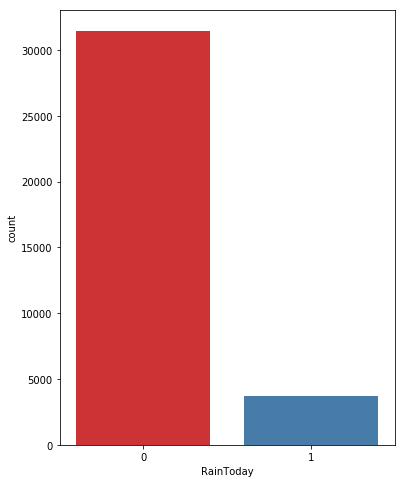

In [115]:
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainToday", data=df, palette="Set1")
plt.show()

In [116]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train_set_train, y_train)
print(X_resampled)
print("------------")
print(y_resampled)

C:\Users\JJJ\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\JJJ\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\JJJ\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module

[[-1.09732869 -1.32560514  0.00227139 ... -0.08568938 -0.07775236
  -0.08115134]
 [-0.51536097 -0.36321445 -1.16961023 ... -0.08568938 -0.07775236
  -0.08115134]
 [-1.22665485 -1.26692278 -0.56605922 ... -0.08568938 -0.07775236
  -0.08115134]
 ...
 [-0.32137173 -0.60381212 -1.23667145 ... -0.08568938 -0.07775236
  -0.08115134]
 [ 1.4891945   1.12438336  0.2986926  ... -0.08568938 -0.07775236
  -0.08115134]
 [ 1.52799235  0.96300687 -0.02956944 ... -0.08568938 -0.07775236
  -0.08115134]]
------------
[0 0 0 ... 1 1 1]


# H. Training xgboost

In [117]:
print(X_resampled.shape, X_train_set_val.shape, df_test_set.shape)

(50340, 865) (7032, 449) (34844, 643)


In [118]:
import xgboost as xgb

### *** select features

In [119]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
feature_imp = pd.Series(clf.feature_importances_,index = X_train_onehot.columns).sort_values(ascending = False)
feature_imp

Humidity9am        0.096023
MinTemp            0.050309
MaxTemp            0.049427
Temp3pm            0.046571
Pressure9am        0.044309
                     ...   
Date_12.4          0.000000
Location_4.6       0.000000
Date_14.2          0.000000
Date_92.2          0.000000
WindDir9am_14.6    0.000000
Length: 865, dtype: float64

No handles with labels found to put in legend.


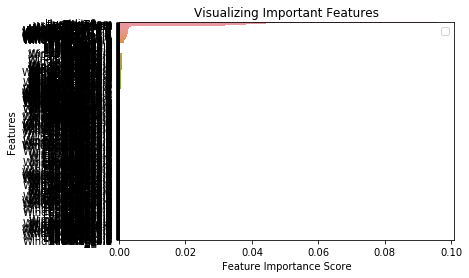

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.savefig('./Importance-Score.png', dpi = 600)
plt.show()

### **** select top 25% important attribute for training ****

In [141]:
## transfer panda series to panda dataframe to get attri
'''
feature_imp --> panda series
'''
# temp = feature_imp
# df_temp = temp.to_frame()

df_feature_imp = feature_imp.to_frame().reset_index()
df_feature_imp

,index,0
0,Humidity9am,0.096023
1,MinTemp,0.050309
2,MaxTemp,0.049427
3,Temp3pm,0.046571
4,Pressure9am,0.044309
...,...,...
860,Date_12.4,0.000000
861,Location_4.6,0.000000
862,Date_14.2,0.000000
863,Date_92.2,0.000000


In [142]:
attri_size = df_feature_imp['index'].count()
print("attributes num: ", attri_size)

attributes num:  865


In [143]:
# select top 25% features

def select_top25(dataframe_imp, attri_num):
    
    top_25 = int(round(attri_num * 0.25))
    
    df_temp = dataframe_imp.head(top_25)
    import_attri_list = df_temp['index'].tolist()
    
    return import_attri_list

In [144]:
attri_imp_top25 = select_top25(df_feature_imp, attri_size)

#### *** extract top 25% attri from each data set

In [150]:
X_train_RF = X_train_onehot[attri_imp_top25]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [149]:
X_train_RF

,Humidity9am,MinTemp,MaxTemp,Temp3pm,Pressure9am,Humidity3pm,Cloud9am,Sunshine,Temp9am,Pressure3pm,...,WindDir9am_6.8,WindDir3pm_8.4,WindDir3pm_6.6,WindGustDir_6.4,Date_1.0,WindDir9am_6.4,Date_23.0,Date_43.0,WindDir3pm_7.4,Date_76.0
0,63.010050,5.30,14.70,13.5,1018.034270,58.980533,4.167266,7.993227,11.66,1018.046381,...,0,0,0,0,0,0,0,0,0,0
1,44.915769,8.90,21.26,22.2,1022.600000,63.836098,1.633453,9.057291,14.00,1020.000000,...,0,0,0,0,1,0,0,0,0,0
2,54.022214,4.50,15.10,14.3,1030.400000,76.145071,0.000000,7.993227,8.00,1027.900000,...,0,0,0,0,0,0,0,0,0,0
3,47.217347,17.80,29.50,28.3,1011.300000,57.046799,3.600000,7.993227,21.80,1008.900000,...,0,0,0,0,0,0,0,0,0,0
4,54.462556,8.14,16.70,16.2,1019.586854,72.552121,6.000000,9.000000,12.80,1015.400000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,7.970293,19.00,37.70,36.2,1013.900000,46.208558,2.666906,13.600000,27.00,1011.100000,...,0,0,0,0,0,0,0,0,0,0
28120,46.468215,1.90,17.90,16.3,1019.300000,82.268761,7.000000,2.700000,6.70,1004.600000,...,0,0,0,0,0,0,0,0,0,0
28121,45.750448,10.74,21.00,20.6,1021.600000,56.281353,4.167266,7.993227,16.20,1019.200000,...,0,0,0,0,0,0,0,0,0,0
28122,54.929642,7.10,16.50,15.2,1008.400000,64.890496,4.167266,2.900000,10.96,1012.440000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_RF = X_train_onehot[attri_imp_top25]

In [145]:
# print(feature_imp)
# idx = 0
# for attri in feature_imp.values:
#     if idx < 100:
#         print(attri)
#     else:
#         break
#     idx += 1

# temp = feature_imp
# # df_temp = temp.to_frame()
# df_temp = temp.to_frame().reset_index()

# df_temp

In [146]:
# df_temp = df_temp.head(100)

In [147]:
# import_attri_list = df_temp['index'].tolist() 
# import_attri_list



In [ ]:
# df_temp['attributes']

# for i in select_attri.columns:
#     print(i)

# train_column = [var for var in select_attri.columns]

In [123]:
# test = X_train_onehot

In [124]:
# test

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_8.0,WindDir3pm_8.2,WindDir3pm_8.4,WindDir3pm_8.6,WindDir3pm_8.8,WindDir3pm_9.0,WindDir3pm_9.2,WindDir3pm_9.4,WindDir3pm_9.6,WindDir3pm_9.8
0,5.30,14.70,5.694960,7.993227,30.0,13.0,11.0,63.010050,58.980533,1018.034270,...,0,0,0,0,0,0,0,0,0,0
1,8.90,21.26,2.200000,9.057291,20.0,9.0,6.0,44.915769,63.836098,1022.600000,...,0,0,0,0,0,0,0,0,0,0
2,4.50,15.10,4.000000,7.993227,33.4,19.0,20.0,54.022214,76.145071,1030.400000,...,1,0,0,0,0,0,0,0,0,0
3,17.80,29.50,5.694960,7.993227,61.0,15.0,24.0,47.217347,57.046799,1011.300000,...,0,0,0,0,0,0,0,0,0,0
4,8.14,16.70,2.000000,9.000000,33.0,13.6,17.0,54.462556,72.552121,1019.586854,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,19.00,37.70,5.694960,13.600000,43.0,24.0,9.0,7.970293,46.208558,1013.900000,...,0,0,0,0,0,0,0,0,0,0
28120,1.90,17.90,2.200000,2.700000,52.0,4.0,26.0,46.468215,82.268761,1019.300000,...,0,1,0,0,0,0,0,0,0,0
28121,10.74,21.00,5.755968,7.993227,30.0,17.0,15.0,45.750448,56.281353,1021.600000,...,0,0,0,0,0,0,0,0,0,0
28122,7.10,16.50,1.400000,2.900000,48.0,11.2,15.0,54.929642,64.890496,1008.400000,...,0,0,0,0,0,0,0,1,0,0


In [125]:
# t = ['MinTemp','MaxTemp', 'Sunshine']

In [126]:
# test[t]

,MinTemp,MaxTemp,Sunshine
0,5.30,14.70,7.993227
1,8.90,21.26,9.057291
2,4.50,15.10,7.993227
3,17.80,29.50,7.993227
4,8.14,16.70,9.000000
...,...,...,...
28119,19.00,37.70,13.600000
28120,1.90,17.90,2.700000
28121,10.74,21.00,7.993227
28122,7.10,16.50,2.900000


### *** extract useful features from training set

In [ ]:
# onehot_col = [var for var in X_train_onehot.columns]
# Training_set = transfer_to_df(X_resampled, onehot_col)
# # X_val_knn = transfer_to_df(X_val_knn, knn_column)
# # df_test_knn = transfer_to_df(df_test_knn, knn_column)

In [ ]:
# Training_set
# for i in train_column:
#     Training_set[i]
# select_attri

In [ ]:

# d = [dict(country=x[0]) for x in s.items()]
# aa = select_attri.set_index('attributes').T.to_dict('list')

In [ ]:
# aa

### *** start train

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=500, max_depth=5)
xgb_model.fit(X_resampled, y_resampled)

# y_pred_valid = xgb_model.predict(df_test_set)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

    print('Confusion matrix')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
# print(X_resampled.shape, X_train_set_val.shape, df_test_set.shape)

In [ ]:
# print(y_val.shape, y_pred_valid.shape)
y_pred_valid = xgb_model.predict(X_train_set_val)
cnf_matrix = confusion_matrix(y_val, y_pred_valid)    

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, ['no rain', 'rain'], title='Confusion matrix')
plt.show()

In [ ]:
print('f1-score: %f' % f1_score(y_val, y_pred_valid))

# Training RBF SVM

In [ ]:
# from sklearn.svm import SVC
# #train rbf model
# svm_rbf = SVC(kernel='rbf' ,C=2 ,random_state=0, probability=True) 
# svm_rbf.fit(X_resampled, y_resampled)

# #predict
# y_pred_rbf = svm_rbf.predict(X_train_set_val)
# y_predprob_rbf = svm_rbf.predict_proba(X_train_set_val)
# y_predprob_po_rbf =  y_predprob_rbf[:,1]
# # print('RBF SVM testing result:',y_pred_rbf)
# # print('RBF SVM testing prob:',y_predprob_po_rbf)
# # print('Misclassified samples: %d' % (y_test != y_pred_rbf).sum())
# print('Accuracy: %.4f' % accuracy_score(y_val, y_pred_rbf))
# print('f1-score: %f' % f1_score(y_val, y_pred_rbf))

# Train whole data set

### concate train and validation data

In [ ]:
X_train_set = np.vstack([X_train_set_train, X_train_set_val])
Y = np.hstack([y_train,y_val])

### ** imbalanced again

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_resampled_all, y_resampled_all = ros.fit_resample(X_train_set, Y)
# print(X_resampled)
# print("------------")
# print(y_resampled)

In [ ]:
xgb_model_all = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=500, max_depth=5)
xgb_model_all.fit(X_resampled_all, y_resampled_all)

In [ ]:
# y_pred_ans = xgb_model.predict(X_train_set_val)
ans_pred_val = xgb_model.predict(df_test_set)
df_sap = pd.DataFrame(ans_pred_val.astype(int), columns = ['RainToday'])
df_sap.to_csv('myAns_0513_knn1hot_1.csv',  index_label = 'Id')

In [ ]:
ans_pred_all = xgb_model_all.predict(df_test_set)
df_sap_all = pd.DataFrame(ans_pred_all.astype(int), columns = ['RainToday'])
df_sap_all.to_csv('myAns_0513_knn1hot_2.csv',  index_label = 'Id')

In [ ]:
import sys
import pickle
import os

In [ ]:
#save model
output = open('model_xgbvalid_0513_knn1hot_1.pkl', 'wb')
pickle.dump(xgb_model, output)
output.close()

In [ ]:
output = open('model_xgball_0513_knn1hot_2.pkl', 'wb')
pickle.dump(xgb_model_all, output)
output.close()

In [ ]:
# correlation = df.corr()

In [ ]:
# plt.figure(figsize=(16,12))
# plt.title('Correlation Heatmap of Rain in Australia Dataset')
# ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
# plt.show()